In [8]:
pip install sklearn tensorflow matplotlib numpy

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py) ... done
  Using cached tensorflow-2.8.0-cp39-cp39-macosx_10_14_x86_64.whl (217.5 MB)
  Using cached matplotlib-3.5.1-cp39-cp39-macosx_10_9_x86_64.whl (7.3 MB)
  Using cached scikit_learn-1.0.2-cp39-cp39-macosx_10_13_x86_64.whl (8.0 MB)
  Using cached typing_extensions-4.1.1-py3-none-any.whl (26 kB)
     |████████████████████████████████| 961 kB 2.5 MB/s            
  Using cached h5py-3.6.0-cp39-cp39-macosx_10_9_x86_64.whl (3.1 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.whl (462 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  

In [169]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

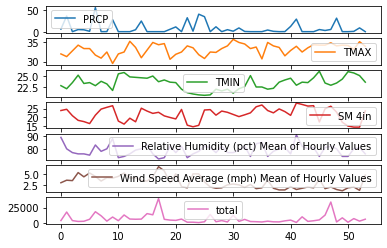

In [262]:
df = pd.read_csv('newCombined.csv')
dg = pd.read_csv('wData.csv')
# X = df.drop(['total', 'Date'], axis = 1)
# ySet = df['total'].to_numpy()
# ySet = ySet.reshape(-1,1)
# scaler = MinMaxScaler()
# scaler.fit(ySet)
# ySet = scaler.transform(ySet)
dFF = dg['DATE']
# X_train, X_val, y_train, y_val = train_test_split(X, ySet, test_size=0.50, random_state=3)
df.plot(subplots=True)

In [218]:

ySet = df['total'].to_numpy()
ySet = ySet.reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(ySet)
ySet = scaler.transform(ySet)
xSet = df.drop(['total'], axis = 1)
xSet = np.array((xSet.loc[xSet['Date'] == "6/12/13"]).drop(['Date'], axis = 1))
startDate = "6/12/13"
startIndex = dFF.index(startDate)


# filtered_idx = filtered_idx[filtered_idx > 0]

# df_new = df.iloc[filtered_idx]
# df_new.head()



In [150]:
xData = []
#getIndex of data


for i in range(len(df)):
    dateAtIndex = df['Date']
    dateAtIndex = dateAtIndex.tolist()
    indexOfDate = dFF.index(dateAtIndex[i])
        # xData= np.append(xData, dg[i-6+28:i+1+28].to_numpy())
    #print(dg[i-6+28:i+1+28].to_numpy())
    xData.append(dg[i-6+28:i+1+28].drop(['DATE'], axis = 1).to_numpy())
        
    # if(i == 3): 
    #     print(np.array(xData))
    
        
    #xData = dg[28-6:29]
    

# index = startIndex
xData = np.array(xData)
# Data = np.array([x for g in range(7) for x in dg.loc[])

In [265]:
xTrain = xData[:41]

yTrain = ySet[:41]
xTest = xData[41:]
yTest = ySet[41:]


print(xTrain)

print(xTrain.shape)

[[[36.6 30.2 22.8 24.6 83.   9.6]
  [ 0.5 29.6 24.7 24.  81.   6.9]
  [ 0.2 32.4 25.2 20.5 78.   4.7]
  ...
  [ 0.  34.2 24.6 23.1 76.   5.9]
  [ 0.  33.9 24.5 21.4 81.   3.5]
  [ 6.1 32.  22.8 23.9 89.   3. ]]

 [[ 0.5 29.6 24.7 24.  81.   6.9]
  [ 0.2 32.4 25.2 20.5 78.   4.7]
  [ 0.  33.3 24.9 20.1 75.   6.4]
  ...
  [ 0.  33.9 24.5 21.4 81.   3.5]
  [ 6.1 32.  22.8 23.9 89.   3. ]
  [36.9 31.3 22.1 24.6 80.   3.6]]

 [[ 0.2 32.4 25.2 20.5 78.   4.7]
  [ 0.  33.3 24.9 20.1 75.   6.4]
  [ 0.  34.2 24.6 23.1 76.   5.9]
  ...
  [ 6.1 32.  22.8 23.9 89.   3. ]
  [36.9 31.3 22.1 24.6 80.   3.6]
  [ 0.  31.9 22.5 22.4 74.   4.6]]

 ...

 [[ 7.8 28.9 23.4 25.9 81.   4.9]
  [ 0.2 32.5 23.2 25.7 80.   4.2]
  [ 1.  30.  23.7 26.3 84.   5.4]
  ...
  [28.2 29.5 21.7 26.6 88.   4.1]
  [ 0.  33.1 22.5 25.1 81.   5.2]
  [12.5 32.2 24.6 23.9 84.   3.8]]

 [[ 0.2 32.5 23.2 25.7 80.   4.2]
  [ 1.  30.  23.7 26.3 84.   5.4]
  [ 3.1 29.1 22.5 28.3 89.   3.9]
  ...
  [ 0.  33.1 22.5 25.1 81.   5.2]
  [1

In [268]:
# #tf.keras.layers.Flatten()
# model = tf.keras.Sequential([tf.keras.layers.Dense(42, input_shape = [7,6,]),
# tf.keras.layers.Dense(42, activation='relu'),
# tf.keras.layers.Dense(1, activation='sigmoid')])

# model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
# model.output_shape
# model = tf.keras.Sequential(
#     [
        
#         tf.keras.layers.Dense(6, activation="relu", name="layer1"),
#         tf.keras.layers.Dense(3, activation="relu", name="layer2"),
#         tf.keras.layers.Dense(4, name="layer3"),
#     ]
# )
# model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])


In [269]:
model.fit(xTrain, yTrain, epochs =50)

Epoch 1/50
2/2 [==============================] - 0s 3ms/step - loss: 0.0563 - accuracy: 0.0244
Epoch 2/50
2/2 [==============================] - 0s 5ms/step - loss: 0.0563 - accuracy: 0.0244
Epoch 3/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0557 - accuracy: 0.0244
Epoch 4/50
2/2 [==============================] - 0s 7ms/step - loss: 0.0481 - accuracy: 0.0244
Epoch 5/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0413 - accuracy: 0.0244
Epoch 6/50
2/2 [==============================] - 0s 9ms/step - loss: 0.0420 - accuracy: 0.0244
Epoch 7/50
2/2 [==============================] - 0s 12ms/step - loss: 0.0412 - accuracy: 0.0244
Epoch 8/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0415 - accuracy: 0.0244
Epoch 9/50
2/2 [==============================] - 0s 5ms/step - loss: 0.0422 - accuracy: 0.0244
Epoch 10/50
2/2 [==============================] - 0s 9ms/step - loss: 0.0369 - accuracy: 0.0244
Epoch 11/50
2/2 [===================

In [261]:
results = model.evaluate(X_val, y_val)
print(results)
# print(model.predict(xTest[1:]))

1/1 [==============================] - 0s 156ms/step - loss: 0.6591 - accuracy: 0.0000e+00
[0.659072995185852, 0.0]
